In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

%matplotlib inline

In [3]:
mycars = pd.read_csv("../01.files/01.Bigdata_basic/mycars.csv")
mycars

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize


In [4]:
mycars.describe().round(3)

,displacement,year,cylinder,mpg,highway_mileage
count,234.000,234.00,234.000,234.000,234.000
mean,3.472,2003.50,5.889,16.859,23.440
std,1.292,4.51,1.612,4.256,5.955
min,1.600,1999.00,4.000,9.000,12.000
25%,2.400,1999.00,4.000,14.000,18.000
50%,3.300,2003.50,6.000,17.000,24.000
75%,4.600,2008.00,8.000,19.000,27.000
max,7.000,2008.00,8.000,35.000,44.000


In [5]:
df = mycars[["model","mpg"]]
df.groupby('model').describe()

mpg                       ...                   
                       count       mean       std  ...   50%    75%   max
model                                              ...                   
4runner 4wd              6.0  15.166667  0.752773  ...  15.0  15.75  16.0
a4                       7.0  18.857143  1.864454  ...  18.0  20.50  21.0
a4 quattro               8.0  17.125000  1.807722  ...  17.0  18.25  20.0
a6 quattro               3.0  16.000000  1.000000  ...  16.0  16.50  17.0
altima                   6.0  20.666667  1.966384  ...  20.0  22.50  23.0
c1500 suburban 2wd       5.0  12.800000  1.303840  ...  13.0  14.00  14.0
camry                    7.0  19.857143  1.463850  ...  21.0  21.00  21.0
camry solara             7.0  19.857143  1.772811  ...  21.0  21.00  22.0
caravan 2wd             11.0  15.818182  1.834022  ...  16.0  17.00  18.0
civic                    9.0  24.444444  1.943651  ...  24.0  25.00  28.0
corolla                  5.0  25.600000  1.673320  ...  26.0  26.00  28.0
corvette                 5.0  15.400000  0.547723  ...  15.0  16.00  16.0
dakota pickup 4wd        9.0  12.777778  1.986063  ...  14.0  14.00  15.0
durango 4wd              7.0  11.857143  1.573592  ...  13.0  13.00  13.0
expedition 2wd           3.0  11.333333  0.577350  ...  11.0  11.50  12.0
explorer 4wd             6.0  13.666667  0.816497  ...  13.5  14.00  15.0
f150 pickup 4wd          7.0  13.000000  1.000000  ...  13.0  13.50  14.0
forester awd             6.0  18.833333  0.983192  ...  18.5  19.75  20.0
grand cherokee 4wd       8.0  13.500000  2.507133  ...  14.0  15.00  17.0
grand prix               5.0  17.000000  1.000000  ...  17.0  18.00  18.0
gti                      5.0  20.000000  2.000000  ...  21.0  21.00  22.0
impreza awd              8.0  19.625000  0.744024  ...  19.5  20.00  21.0
jetta                    9.0  21.222222  4.867694  ...  21.0  21.00  33.0
k1500 tahoe 4wd          4.0  12.500000  1.732051  ...  12.5  14.00  14.0
land cruiser wagon 4wd   2.0  12.000000  1.414214  ...  12.0  12.50  13.0
malibu                   5.0  18.800000  1.923538  ...  18.0  19.00  22.0
maxima                   3.0  18.666667  0.577350  ...  19.0  19.00  19.0
mountaineer 4wd          4.0  13.250000  0.500000  ...  13.0  13.25  14.0
mustang                  9.0  15.888889  1.452966  ...  15.0  17.00  18.0
navigator 2wd            3.0  11.333333  0.577350  ...  11.0  11.50  12.0
new beetle               6.0  24.000000  6.511528  ...  20.5  27.00  35.0
passat                   7.0  18.571429  1.902379  ...  18.0  20.00  21.0
pathfinder 4wd           4.0  13.750000  1.258306  ...  14.0  14.25  15.0
ram 1500 pickup 4wd     10.0  11.400000  1.505545  ...  11.5  12.75  13.0
range rover              4.0  11.500000  0.577350  ...  11.5  12.00  12.0
sonata                   7.0  19.000000  1.414214  ...  18.0  20.00  21.0
tiburon                  7.0  18.285714  1.603567  ...  19.0  19.50  20.0
toyota tacoma 4wd        7.0  15.571429  0.786796  ...  15.0  16.00  17.0

[38 rows x 8 columns]

In [6]:
data_q = pd.read_csv("../01.files/01.Bigdata_basic/EXH_QC1.csv")
data_q

,Flaws,Period,Strength,Baking Time,Cabbage weight
0,Scratch,Day,37.6,0.798922,3.6
1,Scratch,Day,38.6,0.849020,2.9
2,Peel,Day,37.2,0.816163,2.8
3,Peel,Day,36.4,0.758266,2.6
4,Smudge,Day,38.6,0.815894,3.4
5,Scratch,Day,39.0,0.807477,3.2
6,Other,Day,37.2,0.809068,2.2
7,Other,Evening,36.1,0.766400,2.6
8,Peel,Evening,35.9,0.742243,2.6
9,Peel,Evening,37.1,0.751118,2.4


In [7]:
df = data_q[['Flaws','Period']]
count = df['Flaws'].value_counts().sort_index()

cumcnt = np.cumsum(count)
percent = count / sum(count) * 100
cumpct = np.cumsum(percent)

count_data = pd.DataFrame({'Count':count,'Cumcnt':cumcnt,'Percent':percent, 'CumPct':cumpct})
count_data.columns.name = 'Flaws'
count_data

Flaws,Count,Cumcnt,Percent,CumPct
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0


In [8]:
mu = 115
sigma = 20
x = 135

prob = stats.norm.cdf(x, mu, sigma)
print(round((1-prob) * 100, 2))

15.87


In [9]:
mu = 12
sigma = 3
x1 = 15

prob = stats.norm.cdf(x1,mu,sigma)
print(round((prob-0.5) * 100, 2))

34.13


In [11]:
# t-value

t = 1.53
df = 5
prob = stats.t.cdf(t, df)
print("P(T<=t):", round(prob,3))

P(T<=t): 0.907


In [29]:
# 카이제곱

chisq = 10
df = 30
prob = stats.chi2.cdf(chisq, df)
print(prob)

0.00022625367617675488


In [30]:
f = 2.0
dfnum = 15
dfden = 15

prob = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
print(prob)

0.9044711863270478


In [32]:
# 이항분포

n = 3
for i in range(n+1):
    prob = stats.binom.pmf(k = i, n = n, p = 0.4)
    print(f'P(X={i}) = {round(prob,3)}')

P(X=0) = 0.216
P(X=1) = 0.432
P(X=2) = 0.288
P(X=3) = 0.064


In [33]:
# p-value

df = pd.read_csv("../01.files/01.Bigdata_basic/camshaft.csv")
statistic, p = stats.shapiro(df['Supp1'])
statistic, p

(0.9788166105638217, 0.10745975471220626)

In [34]:
# 데이터 직접입력
df = pd.DataFrame({'wgt':[3.6, 2.9, 2.8, 2.6, 3.4, 3.2, 2.2, 2.6, 
                          2.6, 2.4, 2.4, 2.6, 3.4, 2.4, 2.1, 2.6, 
                          3.0, 2.4, 2.7, 2.4, 2.6, 2.9, 2.9, 2.0, 
                          2.7, 2.2, 2.8, 2.7, 1.8, 2.5, 3.0, 3.2, 
                          2.8, 2.6, 3.2, 3.1, 2.9, 2.7, 2.7, 2.2]})

lower, upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 0.397/np.sqrt(40))
print("신뢰구간: ({0}, {1})" .format(lower.round(2), upper.round(2)))

신뢰구간: ([2.57], [2.82])


/Users/yeseul/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [35]:
# df를 직접 입력 
df = pd.DataFrame({'streng':[54.1, 53.3, 56.1, 55.7, 54.0, 54.1, 54.5, 
                             57.1, 55.2, 53.8, 54.1, 54.1, 56.1, 55.0, 
                             55.9, 56.0, 54.9, 54.3, 53.9, 55.0]})
df.head()

,streng
0,54.1
1,53.3
2,56.1
3,55.7
4,54.0


In [37]:
lower, upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale = stats.sem(df))
print("신뢰구간: ({0}, {1})" .format(lower.round(2), upper.round(2)))

신뢰구간: ([54.39], [55.33])


/Users/yeseul/miniconda3/envs/py310/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [38]:
# df 입력
df = pd.DataFrame({'A': [892, 623, 721, 678, 723, 790, 720, 670, 690, 771],
                   'B': [721, 821, 910, 678, 723, 790, 711, 790, 745, 891],
                   'C': [760, 915, 888, 721, 894, 834, 841, 912, 845, 889]})
df.head()

,A,B,C
0,892,721,760
1,623,821,915
2,721,910,888
3,678,678,721
4,723,723,894


<Axes: >

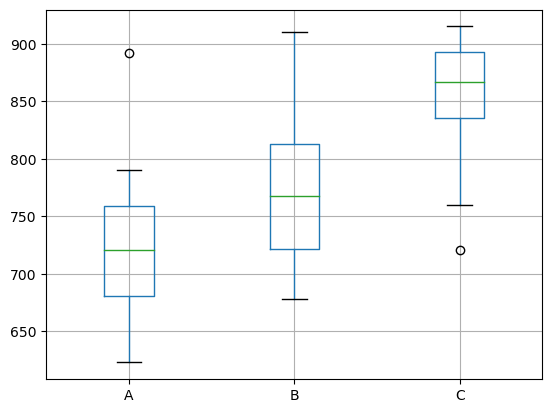

In [39]:
df.boxplot()

In [40]:
statistic, p = stats.shapiro(df['A'])
print("statistic={}, p-value={}".format(statistic,p))

statistic, p = stats.shapiro(df['B'])
print("statistic={}, p-value={}".format(statistic,p))

statistic, p = stats.shapiro(df['C'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9293239820027549, p-value=0.4412758324604767
statistic=0.9242647283417711, p-value=0.39390041877643295
statistic=0.8679398859067827, p-value=0.09458102900458963


In [41]:
stats.bartlett(df['A'], df['B'], df['C'])

BartlettResult(statistic=0.2953960429765837, pvalue=0.8626915899335321)

In [42]:
f_result = stats.f_oneway(df['A'], df['B'], df['C'])

f, p = f_result.statistic, f_result.pvalue

print( "One-way ANOVA ")
print( " F통계량 : {} " .format(f))
print( " p-value : {} " .format(p))

One-way ANOVA 
 F통계량 : 7.09567210575343 
 p-value : 0.0033383379006591135 
